# Timeseries Workshop - 01 Introduction

In [2]:
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("..") / Path("data")

## What are time series?
* Time series are data points indexed in time order.
* Time series data are a collection of observations obtained through repeated measurements over time.

## Toy example - Sunspot Data
* Monthly counts of sunspots from mit 18th century to present
* Univariate time series
* Strong preriodicity of 11 year cycle (actually 22y)
* No dominant trend

,date,sunspot_number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


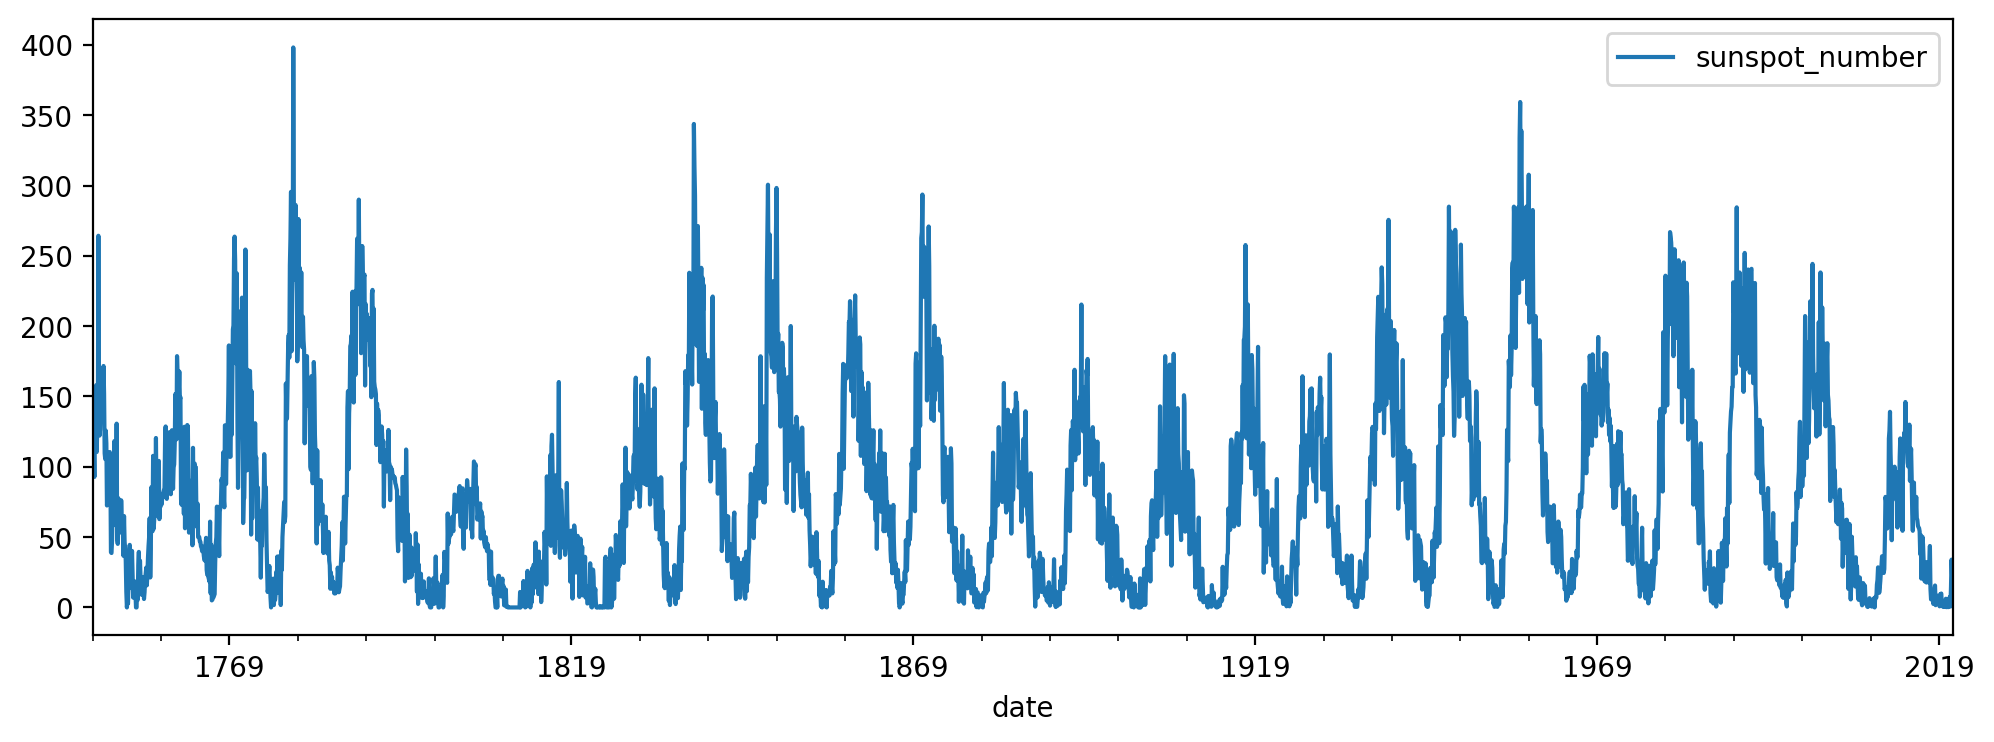

In [8]:
df = pd.read_parquet(DATA_DIR / "sunspots.parquet")

_, ax = plt.subplots(1,1, figsize=(12, 4))
_ = df.set_index("date").plot(ax=ax)
df.head()

<img src="../images/sunspot.gif" width="100">

## What is forecasting?
* Predicting future values of a time series through values and events in the past and present, e.g.

## Forecasting vs. supervised machine learning
#### Supervised learning &#x1F440; 
* We know the values of predictor variables &#x2705; 
* We assume that future data looks the same as past data &#x2705; 
#### Forecasting &#x1F4C8; 
* We often don't know the values of predictor variables &#x274C;
* Sometimes we don't even have predictors &#x274C;
* Time series are dynamic: distributions change! &#x274C;



## Forecasting modelling approach
```mermaid
graph TD
Z(Forecasting) --> A(Specialised<br/>models)
Z(Forecasting) --> B(Off-the-shelf<br/>algorithms)
A --> C(Exponential smoothing,<br/>ARIMA)
A --> D(Prophet)
A --> E(Recursive NNs)
A --> EE(...)
B --> F(Linear regression)
B --> G(Decision trees)
B --> H(...)
```

## Example

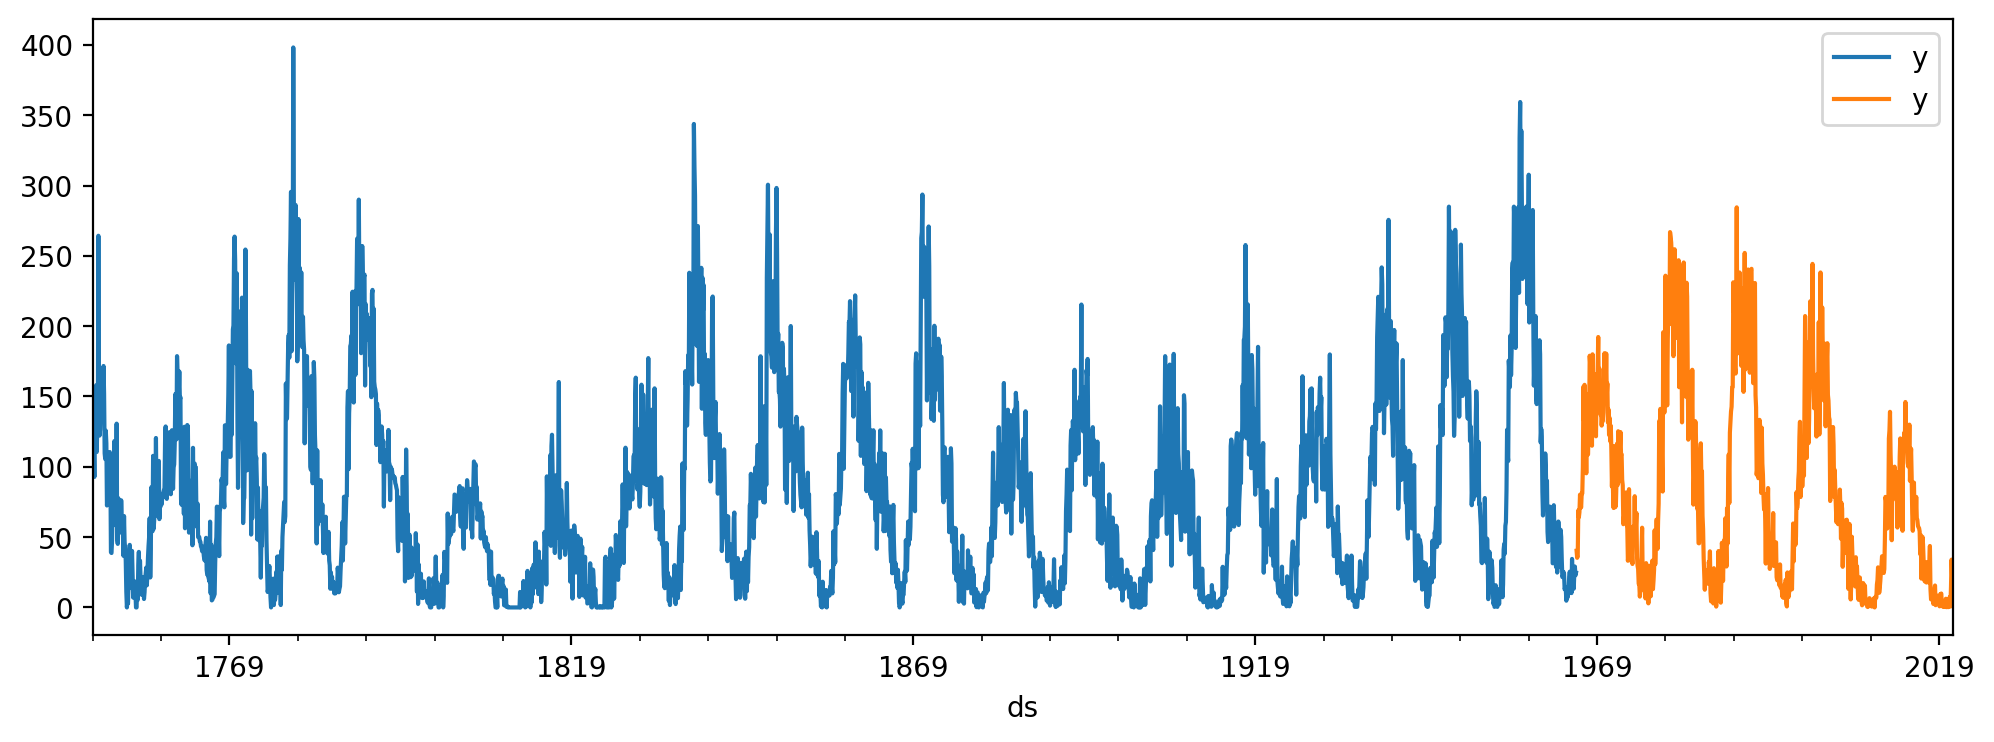

In [29]:
SPLIT_DATE = "1966-01-01"
df_prophet = df.copy().rename(columns={"date": "ds", "sunspot_number": "y"})

df_train = df_prophet[df_prophet["ds"] < SPLIT_DATE]
df_test = df_prophet[df_prophet["ds"] >= SPLIT_DATE]
_, ax = plt.subplots(1,1, figsize=(12, 4))
_ = df_train.set_index("ds").plot(ax=ax, label="train")
_ = df_test.set_index("ds").plot(ax=ax, label="test")
_ = plt.legend()

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

model = NaiveForecaster()